In [1]:
import tflearn
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.estimator import regression
from tflearn.layers.merge_ops import merge
from tflearn.layers.normalization import local_response_normalization
from tflearn.data_preprocessing import ImagePreprocessing
from tflearn.data_augmentation import ImageAugmentation
import numpy as np
from PIL import Image

In [3]:
img_prep = ImagePreprocessing()
img_prep.add_featurewise_zero_center()
img_prep.add_featurewise_stdnorm()

img_aug = ImageAugmentation()
img_aug.add_random_crop((400, 300), 50)
img_aug.add_random_flip_leftright()
img_aug.add_random_rotation(max_angle=25.)
img_aug.add_random_blur(sigma_max=3.)

network = input_data(shape=[None, 400, 300, 3], data_preprocessing=img_prep, data_augmentation=img_aug)

conv1_7_7 = conv_2d(network, 64, 7, strides=2, activation='relu', name='conv1_7_7_s2')
pool1_3_3 = max_pool_2d(conv1_7_7, 3, strides=2)
pool1_3_3 = local_response_normalization(pool1_3_3)
conv2_3_3_reduce = conv_2d(pool1_3_3, 64, 1, activation='relu', name='conv2_3_3_reduce')
conv2_3_3 = conv_2d(conv2_3_3_reduce, 192, 3, activation='relu', name='conv2_3_3')
conv2_3_3 = local_response_normalization(conv2_3_3)
pool2_3_3 = max_pool_2d(conv2_3_3, kernel_size=3, strides=2, name='pool2_3_3_s2')

# 3a
inception_3a_1_1 = conv_2d(pool2_3_3, 64, 1, activation='relu', name='inception_3a_1_1')
inception_3a_3_3_reduce = conv_2d(pool2_3_3, 96, 1, activation='relu', name='inception_3a_3_3_reduce')
inception_3a_3_3 = conv_2d(inception_3a_3_3_reduce, 128, filter_size=3,  activation='relu', name='inception_3a_3_3')
inception_3a_5_5_reduce = conv_2d(pool2_3_3, 16, filter_size=1, activation='relu', name='inception_3a_5_5_reduce')
inception_3a_5_5 = conv_2d(inception_3a_5_5_reduce, 32, filter_size=5, activation='relu', name='inception_3a_5_5')
inception_3a_pool = max_pool_2d(pool2_3_3, kernel_size=3, strides=1, name='inception_3a_pool')
inception_3a_pool_1_1 = conv_2d(inception_3a_pool, 32, filter_size=1, activation='relu', name='inception_3a_pool_1_1')
inception_3a_output = merge([inception_3a_1_1, inception_3a_3_3, inception_3a_5_5, inception_3a_pool_1_1], mode='concat', axis=3)

# 3b
inception_3b_1_1 = conv_2d(inception_3a_output, 128, filter_size=1, activation='relu', name='inception_3b_1_1')
inception_3b_3_3_reduce = conv_2d(inception_3a_output, 128, filter_size=1, activation='relu', name='inception_3b_3_3_reduce')
inception_3b_3_3 = conv_2d(inception_3b_3_3_reduce, 192, filter_size=3, activation='relu', name='inception_3b_3_3')
inception_3b_5_5_reduce = conv_2d(inception_3a_output, 32, filter_size=1, activation='relu', name='inception_3b_5_5_reduce')
inception_3b_5_5 = conv_2d(inception_3b_5_5_reduce, 96, filter_size=5,  name='inception_3b_5_5')
inception_3b_pool = max_pool_2d(inception_3a_output, kernel_size=3, strides=1,  name='inception_3b_pool')
inception_3b_pool_1_1 = conv_2d(inception_3b_pool, 64, filter_size=1, activation='relu', name='inception_3b_pool_1_1')
inception_3b_output = merge([inception_3b_1_1, inception_3b_3_3, inception_3b_5_5, inception_3b_pool_1_1], mode='concat', axis=3, name='inception_3b_output')
pool3_3_3 = max_pool_2d(inception_3b_output, kernel_size=3, strides=2, name='pool3_3_3')

# 4a
inception_4a_1_1 = conv_2d(pool3_3_3, 192, filter_size=1, activation='relu', name='inception_4a_1_1')
inception_4a_3_3_reduce = conv_2d(pool3_3_3, 96, filter_size=1, activation='relu', name='inception_4a_3_3_reduce')
inception_4a_3_3 = conv_2d(inception_4a_3_3_reduce, 208, filter_size=3,  activation='relu', name='inception_4a_3_3')
inception_4a_5_5_reduce = conv_2d(pool3_3_3, 16, filter_size=1, activation='relu', name='inception_4a_5_5_reduce')
inception_4a_5_5 = conv_2d(inception_4a_5_5_reduce, 48, filter_size=5,  activation='relu', name='inception_4a_5_5')
inception_4a_pool = max_pool_2d(pool3_3_3, kernel_size=3, strides=1,  name='inception_4a_pool')
inception_4a_pool_1_1 = conv_2d(inception_4a_pool, 64, filter_size=1, activation='relu', name='inception_4a_pool_1_1')
inception_4a_output = merge([inception_4a_1_1, inception_4a_3_3, inception_4a_5_5, inception_4a_pool_1_1], mode='concat', axis=3, name='inception_4a_output')

# 4b
inception_4b_1_1 = conv_2d(inception_4a_output, 160, filter_size=1, activation='relu', name='inception_4a_1_1')
inception_4b_3_3_reduce = conv_2d(inception_4a_output, 112, filter_size=1, activation='relu', name='inception_4b_3_3_reduce')
inception_4b_3_3 = conv_2d(inception_4b_3_3_reduce, 224, filter_size=3, activation='relu', name='inception_4b_3_3')
inception_4b_5_5_reduce = conv_2d(inception_4a_output, 24, filter_size=1, activation='relu', name='inception_4b_5_5_reduce')
inception_4b_5_5 = conv_2d(inception_4b_5_5_reduce, 64, filter_size=5,  activation='relu', name='inception_4b_5_5')
inception_4b_pool = max_pool_2d(inception_4a_output, kernel_size=3, strides=1,  name='inception_4b_pool')
inception_4b_pool_1_1 = conv_2d(inception_4b_pool, 64, filter_size=1, activation='relu', name='inception_4b_pool_1_1')
inception_4b_output = merge([inception_4b_1_1, inception_4b_3_3, inception_4b_5_5, inception_4b_pool_1_1], mode='concat', axis=3, name='inception_4b_output')

# 4c
inception_4c_1_1 = conv_2d(inception_4b_output, 128, filter_size=1, activation='relu', name='inception_4c_1_1')
inception_4c_3_3_reduce = conv_2d(inception_4b_output, 128, filter_size=1, activation='relu', name='inception_4c_3_3_reduce')
inception_4c_3_3 = conv_2d(inception_4c_3_3_reduce, 256,  filter_size=3, activation='relu', name='inception_4c_3_3')
inception_4c_5_5_reduce = conv_2d(inception_4b_output, 24, filter_size=1, activation='relu', name='inception_4c_5_5_reduce')
inception_4c_5_5 = conv_2d(inception_4c_5_5_reduce, 64,  filter_size=5, activation='relu', name='inception_4c_5_5')
inception_4c_pool = max_pool_2d(inception_4b_output, kernel_size=3, strides=1)
inception_4c_pool_1_1 = conv_2d(inception_4c_pool, 64, filter_size=1, activation='relu', name='inception_4c_pool_1_1')
inception_4c_output = merge([inception_4c_1_1, inception_4c_3_3, inception_4c_5_5, inception_4c_pool_1_1], mode='concat', axis=3, name='inception_4c_output')

# 4d
inception_4d_1_1 = conv_2d(inception_4c_output, 112, filter_size=1, activation='relu', name='inception_4d_1_1')
inception_4d_3_3_reduce = conv_2d(inception_4c_output, 144, filter_size=1, activation='relu', name='inception_4d_3_3_reduce')
inception_4d_3_3 = conv_2d(inception_4d_3_3_reduce, 288, filter_size=3, activation='relu', name='inception_4d_3_3')
inception_4d_5_5_reduce = conv_2d(inception_4c_output, 32, filter_size=1, activation='relu', name='inception_4d_5_5_reduce')
inception_4d_5_5 = conv_2d(inception_4d_5_5_reduce, 64, filter_size=5,  activation='relu', name='inception_4d_5_5')
inception_4d_pool = max_pool_2d(inception_4c_output, kernel_size=3, strides=1,  name='inception_4d_pool')
inception_4d_pool_1_1 = conv_2d(inception_4d_pool, 64, filter_size=1, activation='relu', name='inception_4d_pool_1_1')
inception_4d_output = merge([inception_4d_1_1, inception_4d_3_3, inception_4d_5_5, inception_4d_pool_1_1], mode='concat', axis=3, name='inception_4d_output')

# 4e
inception_4e_1_1 = conv_2d(inception_4d_output, 256, filter_size=1, activation='relu', name='inception_4e_1_1')
inception_4e_3_3_reduce = conv_2d(inception_4d_output, 160, filter_size=1, activation='relu', name='inception_4e_3_3_reduce')
inception_4e_3_3 = conv_2d(inception_4e_3_3_reduce, 320, filter_size=3, activation='relu', name='inception_4e_3_3')
inception_4e_5_5_reduce = conv_2d(inception_4d_output, 32, filter_size=1, activation='relu', name='inception_4e_5_5_reduce')
inception_4e_5_5 = conv_2d(inception_4e_5_5_reduce, 128,  filter_size=5, activation='relu', name='inception_4e_5_5')
inception_4e_pool = max_pool_2d(inception_4d_output, kernel_size=3, strides=1,  name='inception_4e_pool')
inception_4e_pool_1_1 = conv_2d(inception_4e_pool, 128, filter_size=1, activation='relu', name='inception_4e_pool_1_1')
inception_4e_output = merge([inception_4e_1_1, inception_4e_3_3, inception_4e_5_5, inception_4e_pool_1_1], axis=3, mode='concat')
pool4_3_3 = max_pool_2d(inception_4e_output, kernel_size=3, strides=2, name='pool_3_3')

# 5a
inception_5a_1_1 = conv_2d(pool4_3_3, 256, filter_size=1, activation='relu', name='inception_5a_1_1')
inception_5a_3_3_reduce = conv_2d(pool4_3_3, 160, filter_size=1, activation='relu', name='inception_5a_3_3_reduce')
inception_5a_3_3 = conv_2d(inception_5a_3_3_reduce, 320, filter_size=3, activation='relu', name='inception_5a_3_3')
inception_5a_5_5_reduce = conv_2d(pool4_3_3, 32, filter_size=1, activation='relu', name='inception_5a_5_5_reduce')
inception_5a_5_5 = conv_2d(inception_5a_5_5_reduce, 128, filter_size=5,  activation='relu', name='inception_5a_5_5')
inception_5a_pool = max_pool_2d(pool4_3_3, kernel_size=3, strides=1,  name='inception_5a_pool')
inception_5a_pool_1_1 = conv_2d(inception_5a_pool, 128, filter_size=1, activation='relu', name='inception_5a_pool_1_1')
inception_5a_output = merge([inception_5a_1_1, inception_5a_3_3, inception_5a_5_5, inception_5a_pool_1_1], axis=3, mode='concat')

# 5b
inception_5b_1_1 = conv_2d(inception_5a_output, 384, filter_size=1, activation='relu', name='inception_5b_1_1')
inception_5b_3_3_reduce = conv_2d(inception_5a_output, 192, filter_size=1, activation='relu', name='inception_5b_3_3_reduce')
inception_5b_3_3 = conv_2d(inception_5b_3_3_reduce, 384,  filter_size=3, activation='relu', name='inception_5b_3_3')
inception_5b_5_5_reduce = conv_2d(inception_5a_output, 48, filter_size=1, activation='relu', name='inception_5b_5_5_reduce')
inception_5b_5_5 = conv_2d(inception_5b_5_5_reduce, 128, filter_size=5, activation='relu', name='inception_5b_5_5')
inception_5b_pool = max_pool_2d(inception_5a_output, kernel_size=3, strides=1,  name='inception_5b_pool')
inception_5b_pool_1_1 = conv_2d(inception_5b_pool, 128, filter_size=1, activation='relu', name='inception_5b_pool_1_1')
inception_5b_output = merge([inception_5b_1_1, inception_5b_3_3, inception_5b_5_5, inception_5b_pool_1_1], axis=3, mode='concat')
pool5_7_7 = avg_pool_2d(inception_5b_output, kernel_size=7, strides=1)
pool5_7_7 = dropout(pool5_7_7, 0.4)

# fc
loss = fully_connected(pool5_7_7, 30, activation='softmax')
network = regression(loss, optimizer='momentum',
                     loss='categorical_crossentropy',
                     learning_rate=0.001)

In [4]:
model = tflearn.DNN(network, tensorboard_verbose=0)
model.load('/home/chrisjan/project/training/koi_train5/models/koi-googlenet-classifier.tfl')

INFO:tensorflow:Restoring parameters from /home/chrisjan/project/training/koi_train5/models/koi-googlenet-classifier.tfl


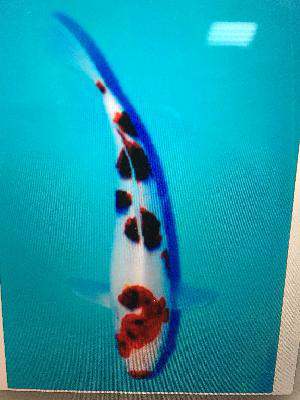

In [90]:
#img_dir = '/home/chrisjan/project/training/koi_train5/images/train/29/IKI17052338_r_90.png'
img_dir = '/home/chrisjan/project/training/koi_test2/images/010.jpg'
img = Image.open(img_dir)
img_resize = img.resize((300,400))
img = np.asarray(img, dtype="float32")/255.
img_resize

In [91]:
prediction = model.predict([img])
sorted(enumerate(prediction[0]), key=lambda x: x[1])

[(3, 1.9711947e-34),
 (0, 2.467581e-33),
 (29, 6.9669625e-33),
 (12, 1.8984189e-30),
 (6, 2.4744374e-30),
 (11, 1.0356084e-28),
 (7, 1.1943811e-28),
 (5, 1.4414464e-28),
 (10, 1.7446692e-28),
 (15, 5.7278871e-28),
 (27, 1.189772e-25),
 (2, 1.3709192e-25),
 (19, 3.5867529e-24),
 (9, 9.8224555e-23),
 (13, 1.1429336e-22),
 (25, 1.3974858e-22),
 (22, 3.0588121e-22),
 (8, 3.8258827e-22),
 (17, 9.1734754e-22),
 (4, 1.1619828e-21),
 (24, 8.7209321e-21),
 (14, 7.9059607e-19),
 (26, 1.1574549e-17),
 (28, 1.5957281e-16),
 (1, 3.8374121e-16),
 (16, 8.0399683e-14),
 (20, 1.2464362e-12),
 (18, 1.4709274e-10),
 (21, 3.7779355e-07),
 (23, 0.99999964)]

In [60]:
np.argmax(prediction[0])

23